<a href="https://colab.research.google.com/github/Wayaneka-xy/Tugas-Besar-Pengenalan-Pola/blob/main/Tugas_Besar_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Tugas besar Pengenalan Pola
Ni Wayan Eka Budiariani
2315102011**

**A.Pengumpulan Data**

In [6]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
base_dir = '/content/drive/My Drive/Dataset/'
#!ls "/content/drive/My Drive/Dataset/"

In [8]:
#menentukan direktori
print(os.listdir(base_dir))

bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

['bahan', 'latih', 'validasi']


In [9]:
#menentukan direktor isi bahan
mature_dir = os.path.join(bahan_dir, 'mature')
immature_dir = os.path.join(bahan_dir, 'immature')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar mata katarak mature :', len(os.listdir(mature_dir)))
print('Jumlah gambar mata katarak immature :', len(os.listdir(immature_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar mata katarak mature : 50
Jumlah gambar mata katarak immature : 50


**B. Penentuan Ciri**

In [10]:
# Direktori isi latih/training
train_mature = os.path.join(train_dir, 'mature/')
train_immature = os.path.join(train_dir, 'immature/')

#Direktori isi validasi
validation_mature = os.path.join(validation_dir, 'mature.')
validation_immature = os.path.join(validation_dir, 'immature.')

**C. Menyiapkan Dataset & Pengambilan Ciri**

In [11]:
import random
import os
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)  # Mengubah 'train' menjadi 'val'
        copyfile(i_file, destination)

# Pembagian training dan validasi
# Misalnya, definisi variabel-variabel direktori
train_mature = os.path.join(train_dir, 'mature')
validation_mature = os.path.join(validation_dir, 'mature')
train_immature = os.path.join(train_dir, 'immature')
validation_immature = os.path.join(validation_dir, 'immature')

# Pastikan direktori tujuan ada atau buat jika tidak ada
os.makedirs(train_mature, exist_ok=True)
os.makedirs(validation_mature, exist_ok=True)
os.makedirs(train_immature, exist_ok=True)
os.makedirs(validation_immature, exist_ok=True)

# Jumlah pembagian data training dan testing
train_ratio = 0.9

# Pembagian training dan validasi
# Training dan validasi untuk mature
source_00 = mature_dir
train_00 = train_mature
val_00 = validation_mature
train_val_split(source_00, train_00, val_00, train_ratio)

# Training dan validasi untuk immature
source_01 = immature_dir
train_01 = train_immature
val_01 = validation_immature
train_val_split(source_01, train_01, val_01, train_ratio)


In [ ]:
print('Jumlah All mature :',len(os.listdir(mature_dir)))
print('Jumlah Train mature :',len(os.listdir(train_mature)))
print('Jumlah Val mature :',len(os.listdir(validation_mature)))

Jumlah All mature : 50
Jumlah Train mature : 45
Jumlah Val mature : 5


**D. Pemilihan Model Pengenalan**

```
# This is formatted as code
```



In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = true

callbacks = myCallback()

**E. Pelatihan**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    verbose=1,
    callbacks=callbacks
)

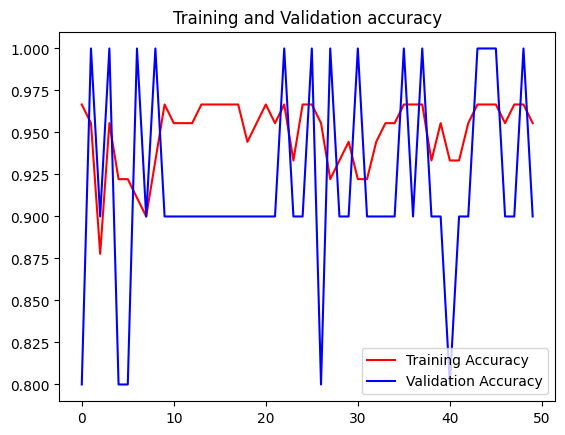

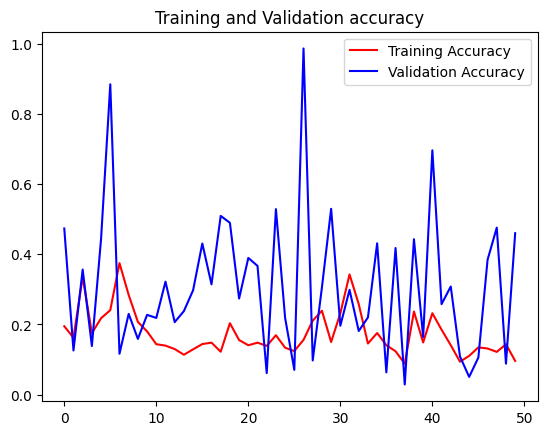

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label= 'Training Accuracy')
plt.plot(epochs, val_loss, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

mencoba klasifikasi

Saving 2_JPG_jpg.rf.403f70b5ee020d956c2b4e9df49af803.jpg to 2_JPG_jpg.rf.403f70b5ee020d956c2b4e9df49af803 (1).jpg


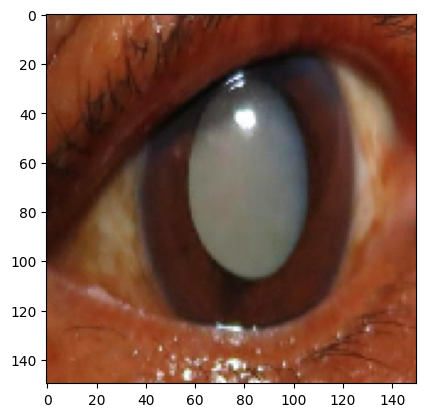

1/1 [==============================] - 0s 31ms/step
2_JPG_jpg.rf.403f70b5ee020d956c2b4e9df49af803 (1).jpg
This image belongs to class mature
This image is from the mature folder


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os
import matplotlib.pyplot as plt


uploaded = files.upload()
class_list = ['mature', 'immature']
#prediksi gambar
for fn in uploaded.keys():
    path = os.path.join('/content', fn)
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)
    print(fn)


    predicted_class_index = np.argmax(classes[0])
    predicted_class = class_list[predicted_class_index]

    print('This image belongs to class', predicted_class)
    if predicted_class == 'mature':
        print('This image is from the mature folder')
    elif predicted_class == 'immature':
        print('This image is from the immature folder')
